In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('precision',4)
pd.set_option('display.width',120)

titanic_df = pd.read_csv("./titanic_dataset/titanic_train.csv")

del titanic_df['Name']
del titanic_df['PassengerId']
del titanic_df['Ticket']
#titanic_df['Embarked_int'] = pd.Series([titanic_df['Embarked']=='S')
titanic_df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22,1,0,7.250,NaN,S
1,1,1,female,38,1,0,71.283,C85,C
2,1,3,female,26,0,0,7.925,NaN,S
3,1,1,female,35,1,0,53.100,C123,S
4,0,3,male,35,0,0,8.050,NaN,S


In [2]:
print(titanic_df.describe())

       Survived   Pclass      Age    SibSp    Parch     Fare
count   891.000  891.000  714.000  891.000  891.000  891.000
mean      0.384    2.309   29.699    0.523    0.382   32.204
std       0.487    0.836   14.526    1.103    0.806   49.693
min       0.000    1.000    0.420    0.000    0.000    0.000
25%       0.000    2.000   20.125    0.000    0.000    7.910
50%       0.000    3.000   28.000    0.000    0.000   14.454
75%       1.000    3.000   38.000    1.000    0.000   31.000
max       1.000    3.000   80.000    8.000    6.000  512.329


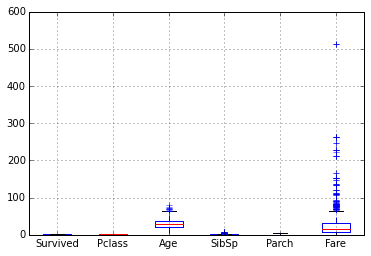

In [3]:
boxplots = titanic_df.boxplot(return_type='axes')

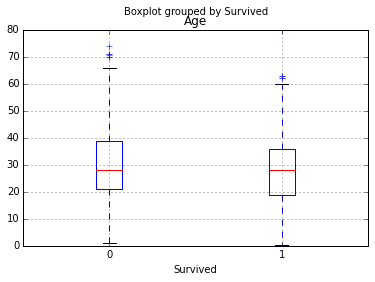

In [4]:
boxplots = titanic_df.boxplot(column='Age',by='Survived',return_type='axes')

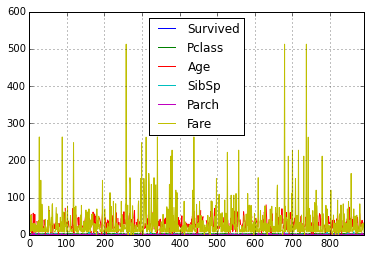

In [5]:
densityplot = titanic_df.plot() #kind='density'

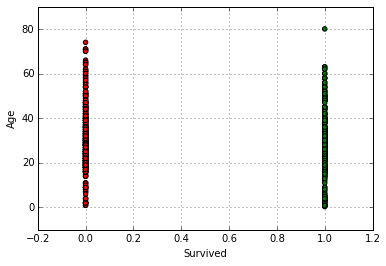

In [16]:
colors_palette = {0:"red",1: "green"}
groups = list(titanic_df.Survived)
colors = [colors_palette[c] for c in groups]
simple_scatterplot = titanic_df.plot(kind='scatter',x=0,y=3,c=colors)

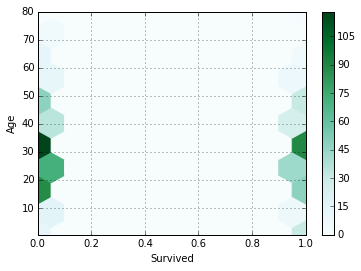

In [17]:
hexbin = titanic_df.plot(kind='hexbin',x=0,y=3,gridsize=10)

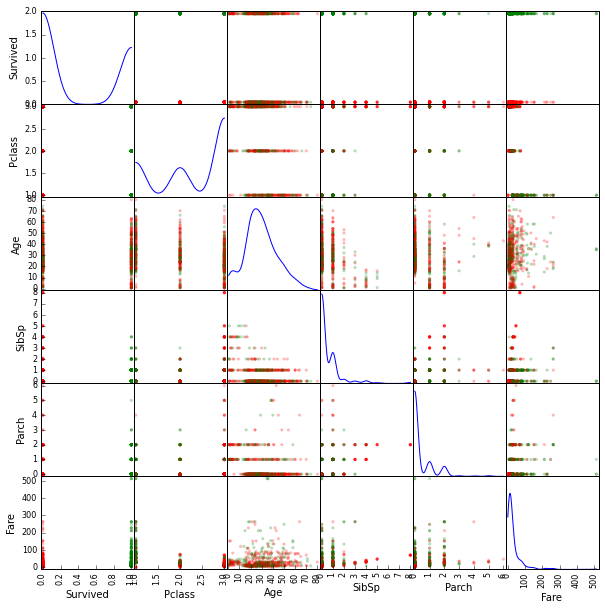

In [8]:
from pandas.tools.plotting import scatter_matrix
colors_palette = {0:"red",1: "green"}
colors = [colors_palette[c] for c in groups]
matrix_of_scatterplots = scatter_matrix(titanic_df,alpha=0.2,figsize=(10,10),color=colors,diagonal='kde')

ValueError: could not convert string to float: S

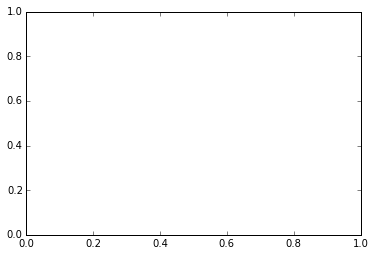

In [18]:
from pandas.tools.plotting import parallel_coordinates
pl1 = parallel_coordinates(titanic_df,'Survived')